Using the hydrogen potential: Convert the Rydbergs to effective Rydbergs and then to meV. 

**************************n =  1  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.9983772766590125 !!!!!!!!!!!!!!!


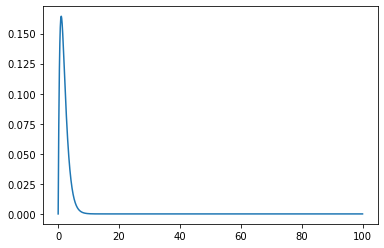

**************************n =  2  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.249711090385914 !!!!!!!!!!!!!!!


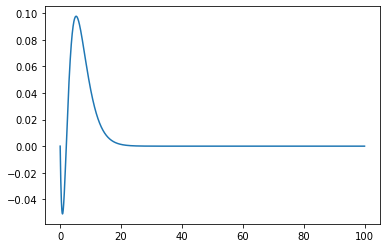

**************************n =  2  l =  1 ***************************************
bisection next step
EigenEnergy is  -0.24992968149504308 !!!!!!!!!!!!!!!


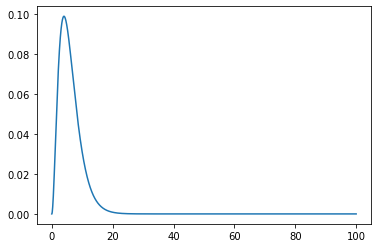

**************************n =  3  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.1109923282118761 !!!!!!!!!!!!!!!


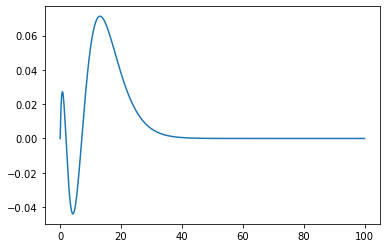

**************************n =  3  l =  1 ***************************************
bisection next step
EigenEnergy is  -0.11105538207846964 !!!!!!!!!!!!!!!


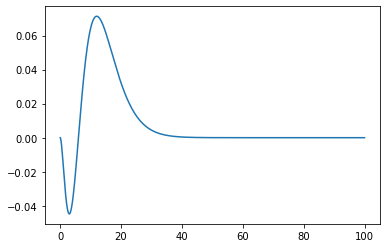

**************************n =  3  l =  2 ***************************************
bisection next step
EigenEnergy is  -0.11108939507233535 !!!!!!!!!!!!!!!


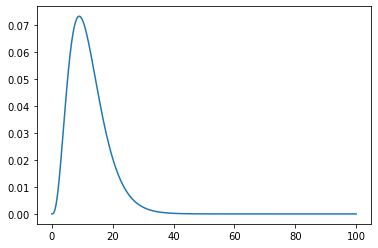

In [11]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
# Alias scipy as sp
import scipy as sp
# scipy.optimize for the curve_fit function
import scipy.optimize
import math

# define rho
totrho = 2000
rho_min = 0
rho_max = 100
rho = np.linspace(rho_min, rho_max, totrho)

def Verlet(epsilon, l):
    # defining rho range
    totrho = 2000
    rho_min = 0
    rho_max = 100
    rho = np.linspace(rho_min, rho_max, totrho)
    drho = (rho_max)/(totrho)
    
    # initialize a zero list of the wavefunction of length rho
    length = totrho
    f = [0]*length
   
    # set the end values of f; mind the indexing 
    f[length - 1] = 0
    f[length - 2] = 10**-10
    
    for i in range(length-2, 0, -1):
        f[i-1] = 2*f[i] - f[i+1] + drho**2*(-epsilon - 2/rho[i] + l*(l+1)/(rho[i]**2))*f[i]
    
    A = sum([x**2 for x in f])
    f = f/np.sqrt(A)
    return f # rho*psi 

# From Feynman's hydrogen lecture + Molecular symmetries by David Willock
def theory(n, l):
    totrho = 2000
    rho_min = 0
    rho_max = 100
    rho = np.linspace(rho_min, rho_max, totrho)
    
    if l == 0:
        # coefficients in front of rho
        a = [0]*n
        a[0] = 1
        for i in range(1, n, 1):
            k = i
            a[i] = 2*(k/n -1)/(k*(k+1))*a[i-1]
    
        # multiply element-wise by rho^k
        g = [0]*totrho
        for i in range(totrho):
            for k in range(n):
                g[i] += a[k]*rho[i]**(k+1)
        # calculating psi
        psi = np.exp(-rho[1::]/n)/rho[1::]*g[1::]
                
    if l == 1:
        if n == 2:
            psi = rho*np.exp(-rho/n)
        elif n == 3:
            psi = (4-2/n*rho)*(2/n)*rho*np.exp(-rho/n)
    elif l == 2:
        psi = 1/n**2*rho**2*np.exp(-rho/n)

    A = sum([x**2 for x in psi])
    psi_n = [x/np.sqrt(A) for x in psi]
    return psi_n

# Begin main - Shooting/Bisection

# Allocate variable to hold solution

En = [0]*6
f_nl = [[0 for x in range(totrho)] for y in range(6)] 

# Allocate variable to hold the difference between solution and BC
delta = [0]*2

# Define initial guess and increments
E1 = -1.1 
dE = 0.015
E2 = E1 + dE

# Define boundary condition 
BC_0 = 0

# Define tolerances
tolerance_min = 10**-10

# set up boolean 
Bisecting = False

# keeping track of the number of solutions
count = 0 

for n in range(3):
    n += 1
    
    for l in range(3):
        if l >= n:
            continue
        # Calculate the wavefunction with initial guess
        f = Verlet(E1, l)
        
        # Define the difference between required BC and our extrapolated BC
        delta[0] = f[0] - BC_0
        print('**************************n = ', n, ' l = ', l, '***************************************')

        for i in range(10**6):
    
            #print('****** iteration', i)
            #print('n = ', n, ' l = ', l)
            # set up for E variables for iterations (incrementing energies)
            if not Bisecting:
                E = E2
                #print('not bisecting')
            if Bisecting:
                E = 0.5*(E1 + E2) 
                #print('bisecting')
            #print('E1, E2, and E are:')
            #print(E1, E2, E)
            # Calculate the wavefunction again with E2
            f = Verlet(E, l)
            #if l != 0:
             #   plt.plot(rho, f, label = 'n = %.1f, l = %.1f' %(n, l))
             #   plt.legend()
             #   plt.show()

            # Define the difference between required BC and second extrapolated BC
            delta[1] = f[0] - BC_0
    
            #print('delta[0] and delta[1] are:')
            #print(delta[0], delta[1])
    
            if abs(delta[1]) < tolerance_min: # found answer
                count += 1
                En[count-1] = E
                f_nl[count-1][:] = f
                print('EigenEnergy is ', En[count-1], '!!!!!!!!!!!!!!!')
                plt.plot(rho, f_nl[count-1][:], label = 'n = %.1f, l = %.1f' %(n, l))
                plt.show()
                
                # prepare the E for the next energy eigenvalue
                if l == n - 1: # about the increase n
                    E1 = E + dE/10
                    E2 = E1 + dE
                else: 
                    E1 = E - dE
                    E2 = E1 + dE/100000
                
                # prepare boolean and continue iterative setup 
                Bisecting = False 
                break    
        
    
            # Determine how to increment E in each case
         
            # If the last step was already a bisection (the next step will be too): change the energy variables
            if Bisecting:
                if delta[0]*delta[1] > 0: # depends on which variable was the last to move
                    if E2_moved == True:
                        E2 = E
                    else: 
                        E1 = E
                        E2_moved = False
                else:
                    if E2_moved == True:
                        E1 = E
                        E2_moved = False
                    else: 
                        E2 = E
                        E2_moved = True
    
            # If the last step was not a bisection but the next one requires one
            if not Bisecting and delta[0]*delta[1] < 0:
                Bisecting = True
                E2 = E # will do first bisection at the beginning of the next iteration
                E2_moved = True
                print('bisection next step')
        
            # Turn Bisecting boolean to true if the two deltas straddle 0 
        
            if not Bisecting:
                E1 = E2
                E2 += dE
               #print('no bisection')
        
            if i == 10**6:
                print('Max iterations reached, please change your initial guess.')
    
            if E >= 0:
                print('No solution found.')
    
        
            # switch over the values to keep up with the energy steps
            delta[0] = delta[1]    
            #print("                    ")
    


Flowchart for the shooting/bisection method:
1. Set an initial guess for the eigenvalue E called E1
2. Set a value called called E2 (for Bisection purposes)
3. Set a dE variable to modify E, where E2 = E1 + dE
4. Calculate f with the initial E1 guess
5. Define delta_0 as the difference between f and required condition at the last index (after extrapolating)
6. Calculate f again but with E2 guess
7. Define delta_2 as the difference between this f and required condition at the last index
8. If delta_2 is within the tolerance E2 is the answer; break
9. If delta_0 and delta_2 have different signs, bisect
10. E = (E1 + E2)/2 
11. Run Verlet to calculate f again
12. Repeat from step 6
13. If delta_0 and delta_2 have the same sign, then assign E1 = E2 and increment E2 by dE
14. Can check for edge cases along the way

Here, we convert En to effective Rydbergs:  
$Ry* = Ry*(m_e/m_0)*(\epsilon_0/\epsilon)^2 = Ry*0.28*(1/8.5)^2$
  
From the values in atomic units from Matt Frick's report

In [19]:
import plotly.graph_objects as go
import numpy as np

En1 = [x*0.28/(8.5)**2 for x in En] # now in effective Rydbergs
En2 = [x*13.6 for x in En1] # now in eV
En3 = [x*1000 for x in En2]

Theory = [-1, -1/4, -1/4, -1/9, -1/9, -1/9]
Err = np.subtract(np.array(En), np.array(Theory))
for i in range(len(Err)):
    Err[i] = round(Err[i], 5)

fig = go.Figure(data=[go.Table(header=dict(values=['Orbital', 'Shooting Method E', 'Analytical E', 'Error E (rounded)']),
                 cells=dict(values=[['1s', '2s', '2p', '3s', '3p', '3d'], [En3[0], En3[1], En3[2], En3[3], En3[4], En3[5] ],
                        [-1, -1/4, -1/4, -1/9, -1/9, -1/9], [Err[0], Err[1], Err[2], Err[3], Err[4], Err[5]]])
                              )])
fig.show()